In [60]:
import pandas as pd

In [61]:
ch = pd.read_csv('Bank_customer_churn_outside.csv')

In [62]:
ch.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Handling Null Values

In [63]:
ch.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [64]:
ch.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [65]:
ch.Credit_Product.fillna('No',inplace=True)

In [66]:
ch.isnull().sum()[ch.isnull().sum()>0]  # there is no null values

Series([], dtype: int64)

In [67]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [68]:
ch = ch.drop(['ID'],axis=1)

In [69]:
ch.head(3)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0


### Label Encoder

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
ch[ch.select_dtypes(include='object').columns] = ch[ch.select_dtypes(include='object').columns].apply(le.fit_transform)

In [72]:
ch.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [73]:
ch.select_dtypes(include='object').columns

Index([], dtype='object')

### Sampling

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
train_ch,test_ch = train_test_split(ch,test_size = 0.2)

In [76]:
print(ch.shape,"  ",train_ch.shape,"  ", test_ch.shape)  

# data distributed in train and test...original_size...train_size...test_size

(245725, 10)    (196580, 10)    (49145, 10)


In [77]:
train_ch_x = train_ch.iloc[ : , :-1]
train_ch_y = train_ch.iloc[: ,-1]

In [78]:
test_ch_x = test_ch.iloc[ : , :-1]
test_ch_y = test_ch.iloc[: ,-1]

### Model Building

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logreg = LogisticRegression()

In [81]:
logreg.fit(train_ch_x,train_ch_y)

LogisticRegression()

### Prediction

In [82]:
pred = logreg.predict(test_ch_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
tab = confusion_matrix(test_ch_y,pred)
tab

array([[37477,     0],
       [11668,     0]], dtype=int64)

### Accuracy

In [85]:
accuracy = tab.diagonal().sum()*100/tab.sum()
accuracy

76.25801200529047

### Recall Score

In [86]:
from sklearn.metrics import recall_score

In [98]:
recall_score(test_ch_y,pred)*100

0.0

### Precision

In [88]:
from sklearn.metrics import precision_score

In [89]:
precision_score(test_ch_y,pred)

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### F1_Score

In [90]:
from sklearn.metrics import f1_score

In [91]:
f1_score(test_ch_y,pred)

0.0

### Confusion matrix

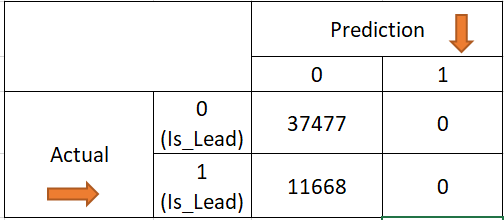

In [97]:
from IPython import display
display.Image('bnk_chrn.PNG')

### Total 37477 customers are not interested to move other bank and that is True Prediction

### Total 11668 customers are interested to move other bank but model has predicted 0 that will be huge loss of customers

### And overall model is not Good at all